In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"C:\Users\Sam Joe Silvano\OneDrive\Desktop\Projects\Password_Prediction_using_NLP\Datasets\password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
data.drop(["index"], axis=1, inplace=True)

In [9]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [12]:
data.isnull().any().sum()

0

In [13]:
data.dtypes

password    object
strength     int64
dtype: object

In [14]:
#Check if any strength is -ve
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [15]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [16]:
# Semantic analysis

In [17]:
data.columns

Index(['password', 'strength'], dtype='object')

In [18]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [19]:
type(data["password"][0])

str

In [20]:
# How many password holds only numeric characters?
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [21]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [22]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [23]:
# How many password hold upper case characters?
data[data["password"].str.isupper()].shape

(1506, 2)

In [24]:
# How many password hold alphabetic characters?
data[data["password"].str.isalpha()].shape

(50, 2)

In [25]:
# How many password hold alpha-numeric characters?
data[data["password"].str.isalnum()].shape

(97203, 2)

In [26]:
# How many password hold title characters?
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [27]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [28]:
import string

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [31]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [32]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [33]:
# Feature Engineering

In [34]:
data["password"][0]

'zxe870819'

In [35]:
len(data["password"][0])

9

In [36]:
data["length"] = data["password"].str.len()

In [37]:
password = "Sam04"

In [38]:
[char for char in password if char.islower()]


['a', 'm']

In [39]:
len([char for char in password if char.islower()])

2

In [40]:
len([char for char in password if char.islower()])/len(password)

0.4

In [41]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [42]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [43]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [44]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase), 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase), 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case), 3)

In [45]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [46]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [47]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case), 3)

In [48]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [49]:
data["special_char_freq"] = data["special_char_freq"]/data["length"]

In [50]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [51]:
# Descriptive Statistics

In [52]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [53]:
data[['length', 'strength']].groupby(['strength']).agg((["min", "max", "mean", "median"]))

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [54]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col, 'strength']].groupby(['strength']).agg((["min", "max", "mean", "median"])))
    print('\n') 

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [55]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

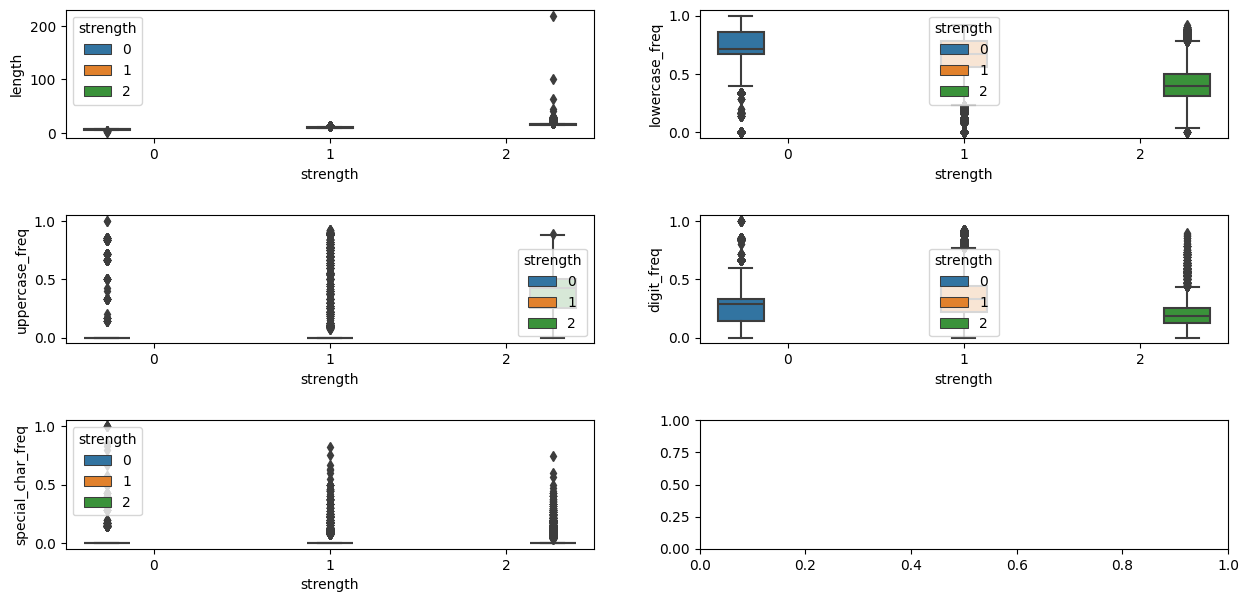

In [56]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,7))

sns.boxplot(x="strength", y='length', hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength", y='lowercase_freq', hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength", y='uppercase_freq', hue="strength", ax=ax3, data=data)
sns.boxplot(x="strength", y='digit_freq', hue="strength", ax=ax4, data=data)
sns.boxplot(x="strength", y='special_char_freq', hue="strength", ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [57]:
def get_dist(data, feature):

    plt.figure(figsize = (10, 8))
    plt.subplot(1,2,1)

    sns.violinplot(x='strength', y=feature,data=data)

    plt.subplot(1,2,2)

    sns.kdeplot(data[data['strength']==0][feature], color="red", label="0")
    sns.kdeplot(data[data['strength']==1][feature], color="blue", label="1")
    sns.kdeplot(data[data['strength']==2][feature], color="orange", label="2")
    plt.legend()
    plt.show()
    

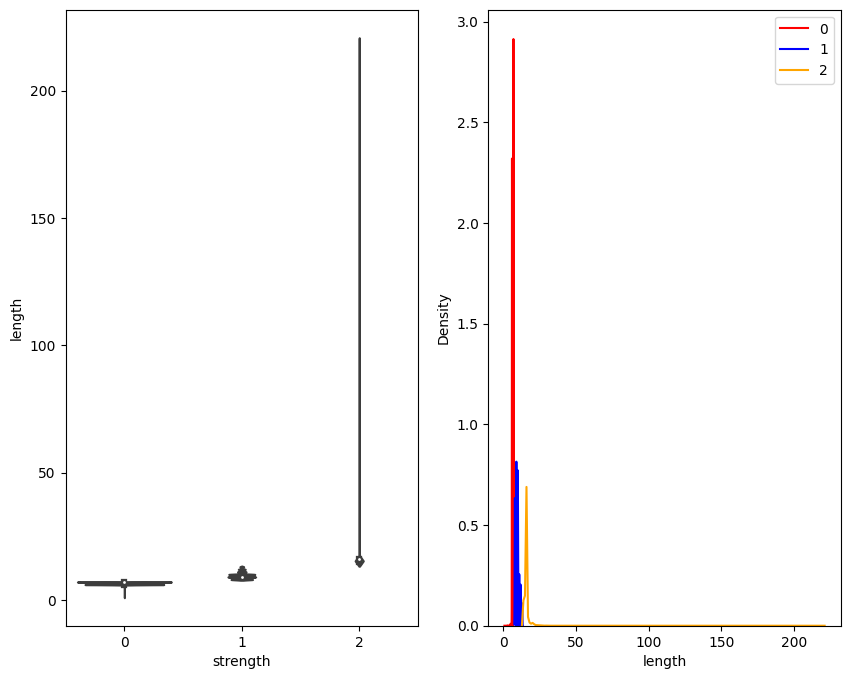

In [58]:
get_dist(data, "length")

In [59]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

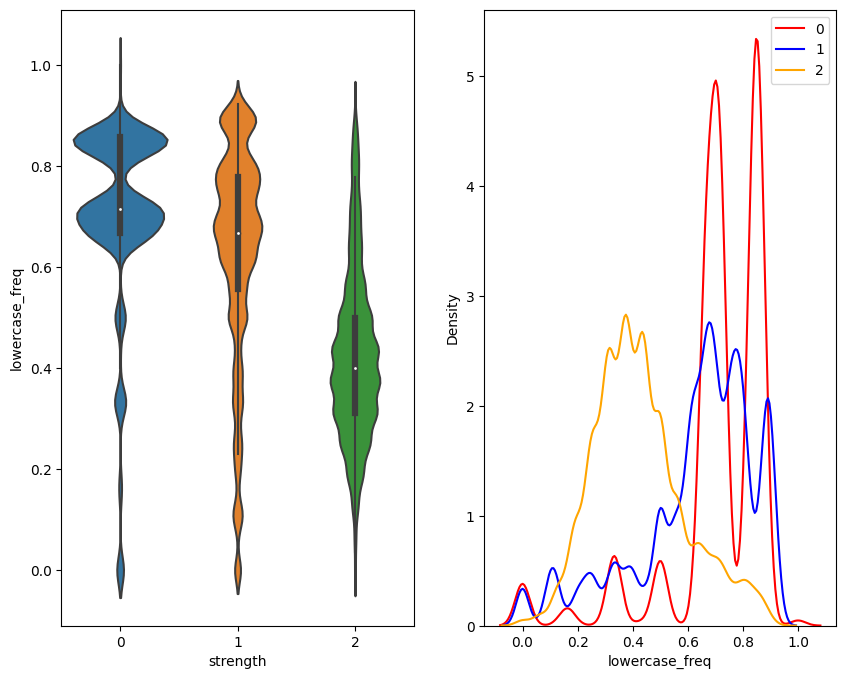

In [60]:
get_dist(data, "lowercase_freq")

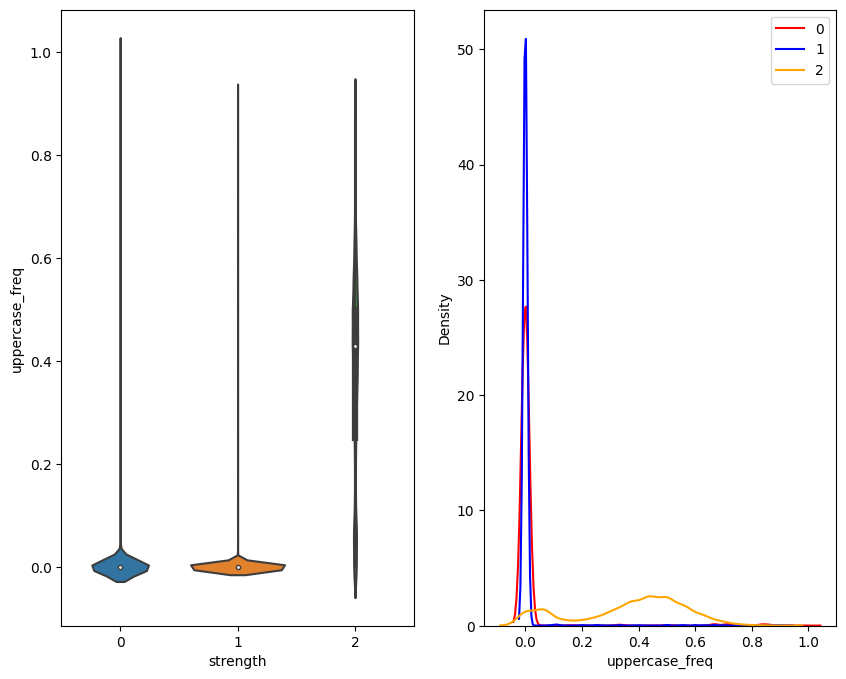

In [61]:
get_dist(data, "uppercase_freq")

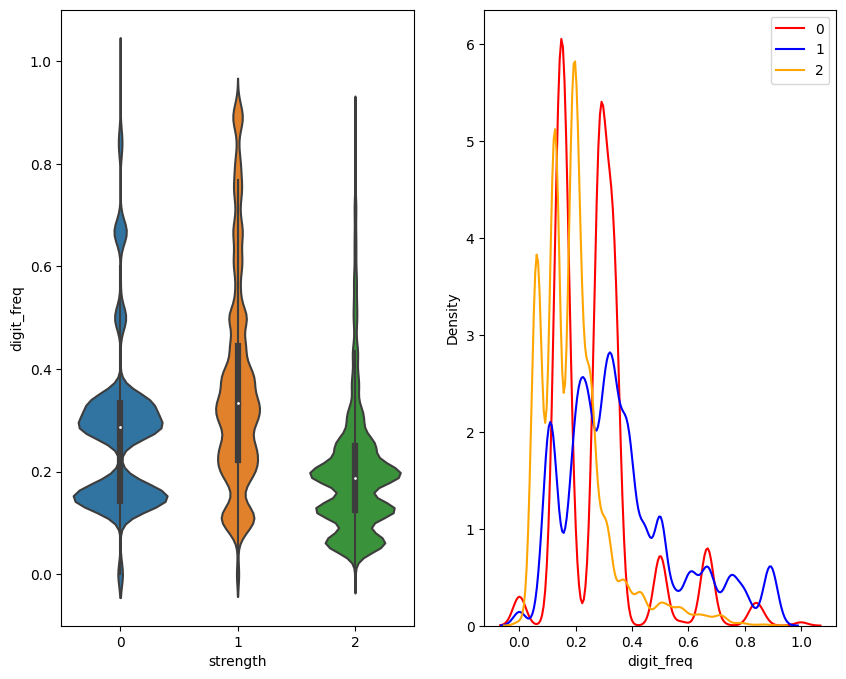

In [62]:
get_dist(data, "digit_freq")

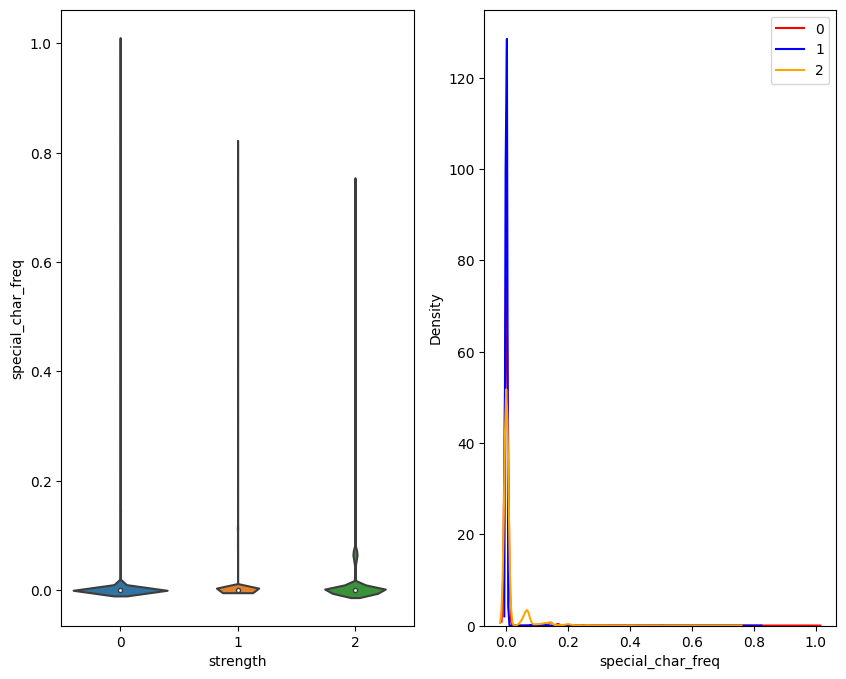

In [63]:
get_dist(data, "special_char_freq")

In [64]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [65]:
dataframe = data.sample(frac=1)

In [66]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
94202,uxiqige430,1,10,0.700,0.000,0.300,0.0
97501,agm67002,1,8,0.375,0.000,0.625,0.0
24788,gunbound69,1,10,0.800,0.000,0.200,0.0
57243,bariklana258,1,12,0.750,0.000,0.250,0.0
3056,milis35,0,7,0.714,0.000,0.286,0.0
...,...,...,...,...,...,...,...
84465,pires85,0,7,0.714,0.000,0.286,0.0
1198,domainku12,1,10,0.800,0.000,0.200,0.0
6425,ilanivu798,1,10,0.700,0.000,0.300,0.0
17897,AfJ8jcTA1NgkWNmN,2,16,0.375,0.500,0.125,0.0


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
vectorizer = TfidfVectorizer(analyzer="char")

In [69]:
x = list(dataframe["password"])

In [70]:
X = vectorizer.fit_transform(x)

In [71]:
X.shape

(100000, 99)

In [72]:
dataframe["password"].shape

(100000,)

In [73]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 842571 stored elements and shape (100000, 99)>

In [74]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
len(vectorizer.get_feature_names_out())

99

In [76]:
df2 =pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [77]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [79]:
df2["length"] = dataframe["length"]
df2["lowercase_freq"] = dataframe["lowercase_freq"]

In [80]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [81]:
from sklearn.model_selection import train_test_split
y = dataframe['strength']
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [82]:
X_train.shape

(80000, 101)

In [83]:
y_train.shape

(80000,)

In [84]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train)

c:\Users\Sam Joe Silvano\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Sam Joe Silvano\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [85]:
y_pred = clf.predict(X_test)

In [86]:
y_pred

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [87]:
from collections import Counter
Counter(y_pred)

Counter({1: 16803, 2: 1804, 0: 1393})

In [88]:
password = "%@123abcd"

In [89]:
sample_array = np.array([password])

In [90]:
sample_matrix = vectorizer.transform(sample_array)
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [91]:
sample_matrix.toarray().shape

(1, 99)

In [92]:
len(password)

9

In [93]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [94]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [132]:
def predict():
    password = input("Enter a password: ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalized_lowercase = len([char for char in password if char.islower()])/len(password )

    # Create a new array with the additional features
    extra_features = np.array([[length_pass, length_normalized_lowercase]])

    # Concatenate the sample matrix with the extra features
    new_matrix = np.concatenate((sample_matrix.toarray(), extra_features), axis=1)

    result = clf.predict(new_matrix)

    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is normal"
    else:
        return "Password is strong"

In [138]:
import warnings
warnings.filterwarnings("ignore")

predict()

'Password is weak'

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_score(y_test, y_pred)

0.80385

In [135]:
confusion_matrix(y_test, y_pred)

array([[  738,  1964,     1],
       [  581, 13870,   334],
       [   74,   969,  1469]], dtype=int64)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.27      0.36      2703
           1       0.83      0.94      0.88     14785
           2       0.81      0.58      0.68      2512

    accuracy                           0.80     20000
   macro avg       0.72      0.60      0.64     20000
weighted avg       0.78      0.80      0.78     20000

